<a href="https://colab.research.google.com/github/SaiMithunPunna/AIDS/blob/main/Logistic_regression_Heart_desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Patient has Heart disease or not**

In [3]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_curve , auc

# **Load the dataset**

In [7]:
df =pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Exploratory Data Analysis (EDA)**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp  ...           ca         thal       target
count  1025.000000  1025.000000  1025.000000  ...  1025.000000  1025.000000  1025.000000
mean     54.434146     0.695610     0.942439  ...     0.754146     2.323902     0.513171
std       9.072290     0.460373     1.029641  ...     1.030798     0.620660     0.500070
min      29.000000     0.000000     0.000000  ...     0.000000     0.000000     0.000000
25%      48.000000     0.000000     0.000000  ...     0.000000     2.000000     0.000000
50%      56.000000     1.000000     1.000000  ...     0.000000     2.000000     1.000000
75%      61.000000     1.000000     2.000000  ...     1.000000     3.000000     1.000000
max      77.000000     1.000000     3.000000  ...     4.000000     3.000000    

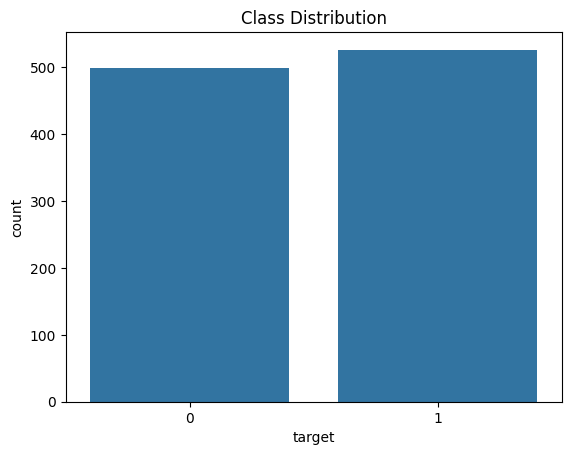

In [8]:
#check for missing values
print(df.isnull().sum());

#display the stats
print(df.describe());


#check the class distribution
sns.countplot(x=df['target']);
plt.title('Class Distribution');
plt.show();


# **Feature Selection and Preporcessing**

In [10]:
x=df.drop("target" , axis=1);
y=df["target"];

#split into taring and testing datasets
X_train , X_test , y_train , y_test=train_test_split(x , y , test_size=0.2 , random_state=42);

#Standardize the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test);

# **Train logistic regression**

In [14]:
model=LogisticRegression();
model.fit(X_train , y_train)

#predict test data

y_pred=model.predict(X_test);
print(y_pred);


[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


# **Model Evaluation**

0.7951219512195122
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



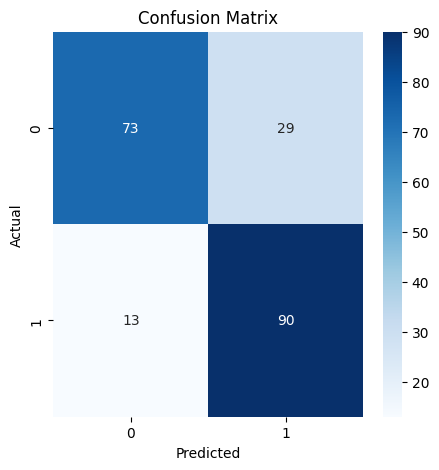

In [20]:
#Accuarcy

accuracy=accuracy_score(y_test , y_pred);
print(accuracy);


#classification report
print("Classification report : \n" , classification_report(y_test , y_pred));

#confusion matrix
plt.figure(figsize=(5 , 5))
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='d' , cmap="Blues");
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.title("Confusion Matrix");
plt.show();
